In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATE_STR = "20250101"
FILE = f"../data/processed/events_clean_{DATE_STR}.csv"

df = pd.read_csv(FILE)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39153 entries, 0 to 39152
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             39153 non-null  int64  
 1   event_date           39153 non-null  int64  
 2   country              39153 non-null  object 
 3   event_code           39153 non-null  int64  
 4   avg_tone             39153 non-null  float64
 5   goldstein_scale      39153 non-null  float64
 6   actor1_name          39153 non-null  object 
 7   actor2_name          26675 non-null  object 
 8   action_geo_fullname  38516 non-null  object 
 9   action_geo_country   38494 non-null  float64
 10  action_geo_lat       39153 non-null  int64  
 11  action_geo_long      39153 non-null  object 
 12  rn                   39153 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 3.9+ MB


In [3]:
df.shape, df.columns

((39153, 13),
 Index(['event_id', 'event_date', 'country', 'event_code', 'avg_tone',
        'goldstein_scale', 'actor1_name', 'actor2_name', 'action_geo_fullname',
        'action_geo_country', 'action_geo_lat', 'action_geo_long', 'rn'],
       dtype='object'))

In [4]:
df.isna().mean().sort_values(ascending=False)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
event_id,39153.0,NaN,NaN,NaN,1218417720.648277,31300.544426,1218366585.0,1218389666.0,1218416469.0,1218445338.0,1218472557.0
event_date,39153.0,NaN,NaN,NaN,20250101.0,0.0,20250101.0,20250101.0,20250101.0,20250101.0,20250101.0
country,39153,195,USA,12056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_code,39153.0,NaN,NaN,NaN,103.63091,194.493638,10.0,36.0,51.0,112.0,1832.0
avg_tone,39153.0,NaN,NaN,NaN,-1.830026,4.421521,-21.95122,-4.925054,-1.843751,1.237624,16.666667
goldstein_scale,39153.0,NaN,NaN,NaN,0.350298,4.904424,-10.0,-2.0,1.9,3.4,10.0
actor1_name,39153,1301,UNITED STATES,6527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
actor2_name,26675,1558,UNITED STATES,1761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_geo_fullname,38516,1249,IS00,1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_geo_country,38494.0,NaN,NaN,NaN,31.181115,19.854651,-85.6221,25.0,35.0,42.3584,78.0


Some analytical fields remain nullable, which is expected in news-based datasets.

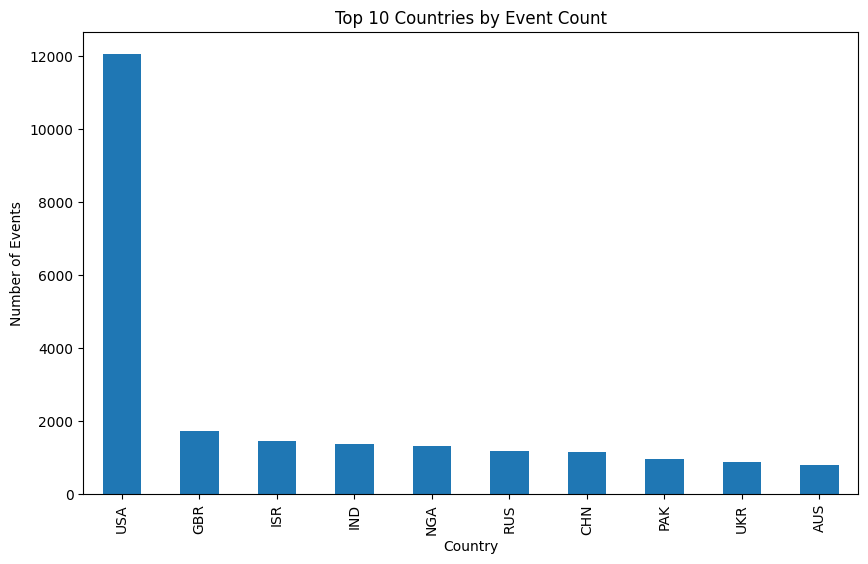

In [5]:
top_countries = (
    df["country"]
    .value_counts()
    .head(10)
)

top_countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Event Count")
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.show()

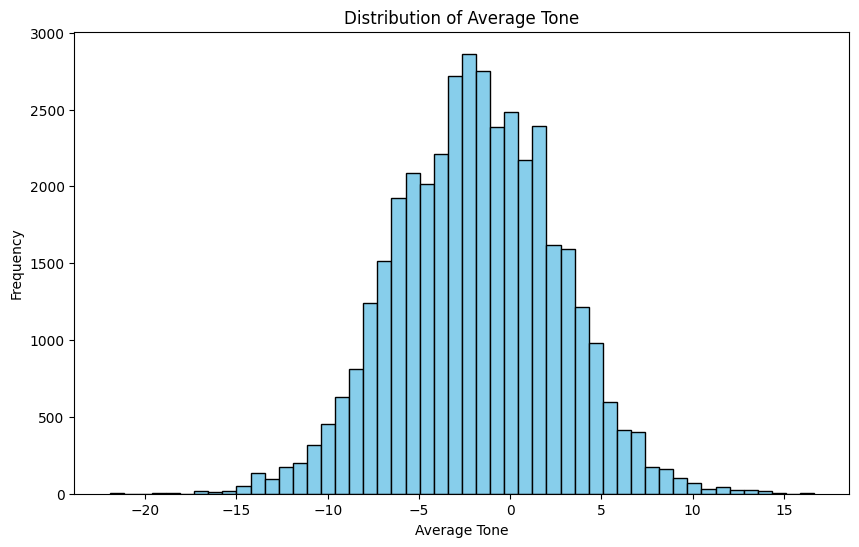

In [6]:
df["avg_tone"].describe()
plt.figure(figsize=(10, 6))
plt.hist(df["avg_tone"].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Average Tone")
plt.xlabel("Average Tone")
plt.ylabel("Frequency")
plt.show()

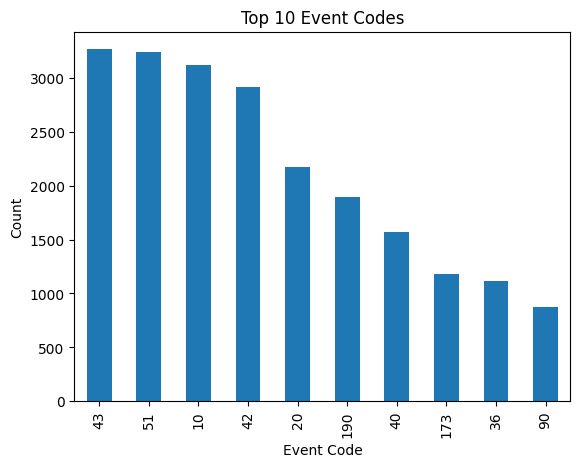

In [8]:
df["event_code"].value_counts().head(10)
df["event_code"].value_counts().head(10).plot(
    kind="bar",
    title="Top 10 Event Codes"
)
plt.xlabel("Event Code")
plt.ylabel("Count")
plt.show()

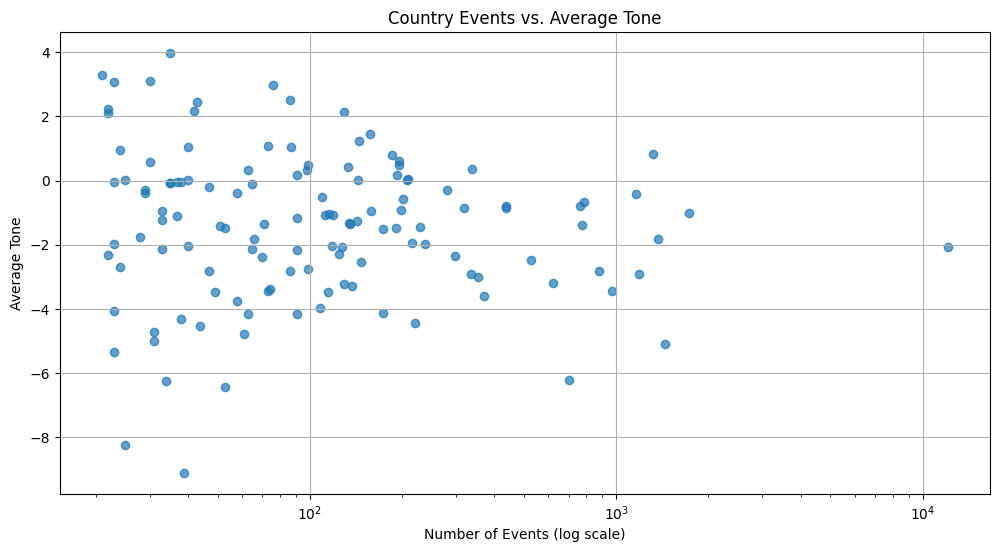

In [11]:
country_stats = (
    df.groupby("country")
      .agg(
          events=("event_id", "count"),
          avg_tone=("avg_tone", "mean")
      )
      .dropna()
)

country_stats = country_stats[country_stats["events"] > 20]
country_stats.sort_values("avg_tone").head(10)
country_stats.sort_values("avg_tone").tail(10)
plt.figure(figsize=(12, 6))
plt.scatter(
    country_stats["events"],
    country_stats["avg_tone"],
    alpha=0.7
)
plt.xscale("log")
plt.title("Country Events vs. Average Tone")
plt.xlabel("Number of Events (log scale)")
plt.ylabel("Average Tone")
plt.grid(True)
plt.show()

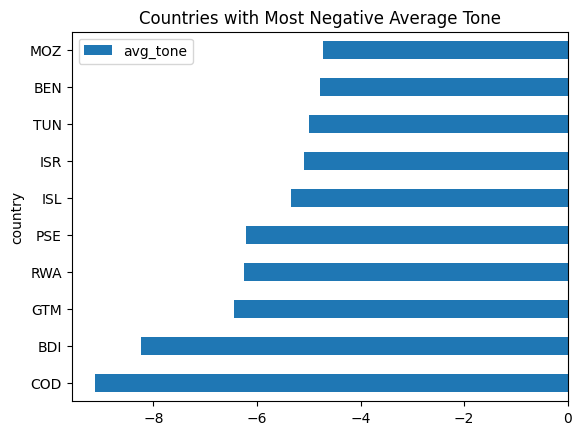

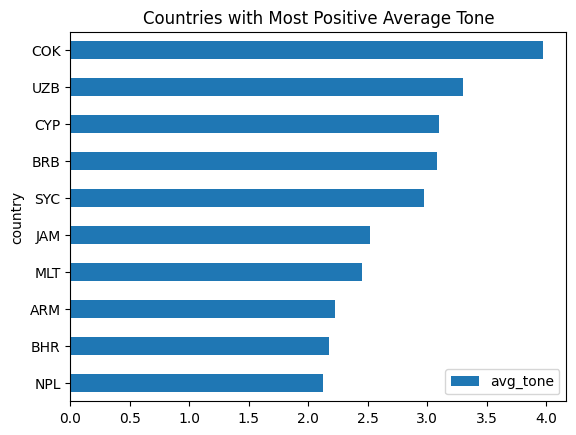

In [12]:
country_stats.sort_values("avg_tone").head(10).plot(
    kind="barh",
    y="avg_tone",
    title="Countries with Most Negative Average Tone"
)
plt.show()
country_stats.sort_values("avg_tone").tail(10).plot(
    kind="barh",
    y="avg_tone",
    title="Countries with Most Positive Average Tone"
)
plt.show()

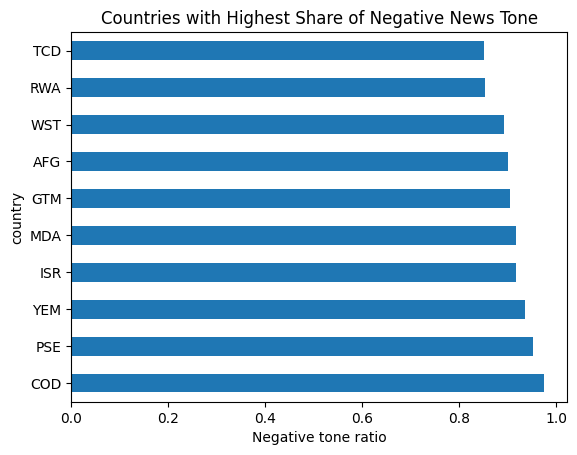

In [ ]:
df['tone_label'] = df['avg_tone'].apply(lambda x: 'negative' if x < 0 else 'positive')

country_tone = (
    df.groupby(["country", "tone_label"])
      .size()
      .unstack(fill_value=0)
)

country_tone["total"] = country_tone.sum(axis=1)

country_tone = country_tone[country_tone["total"] > 30]

country_tone["neg_ratio"] = country_tone["negative"] / country_tone["total"]

country_tone.sort_values("neg_ratio", ascending=False).head(10)

country_tone.sort_values("neg_ratio", ascending=False).head(10)["neg_ratio"].plot(
    kind="barh",
    title="Countries with Highest Share of Negative News Tone"
)
plt.xlabel("Negative tone ratio")
plt.show()


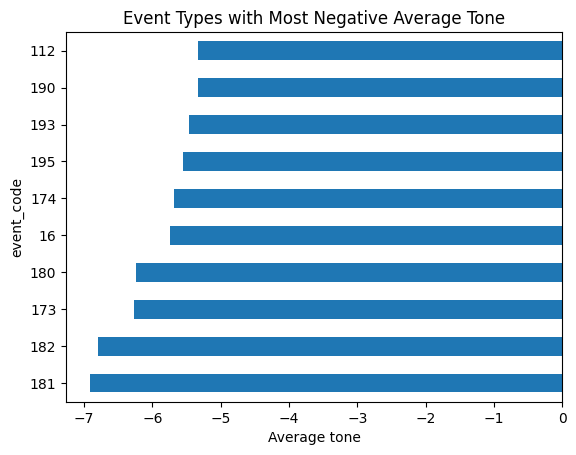

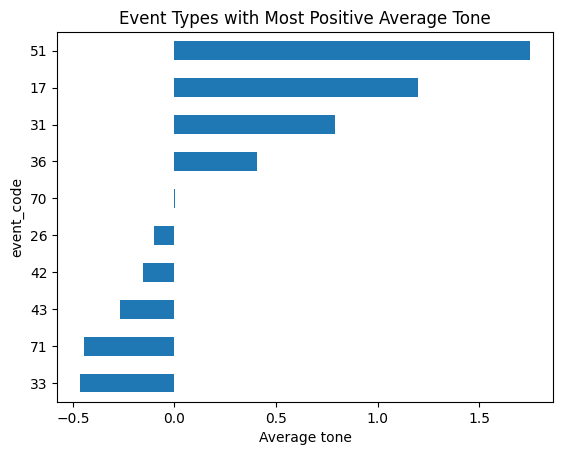

In [18]:
event_tone = (
    df.groupby("event_code")
      .agg(
          events=("event_id", "count"),
          avg_tone=("avg_tone", "mean")
      )
      .dropna()
)

event_tone = event_tone[event_tone["events"] > 50]

event_tone.sort_values("avg_tone").head(10)
event_tone.sort_values("avg_tone").tail(10)
event_tone.sort_values("avg_tone").head(10)["avg_tone"].plot(
    kind="barh",
    title="Event Types with Most Negative Average Tone"
)
plt.xlabel("Average tone")
plt.show()
event_tone.sort_values("avg_tone").tail(10)["avg_tone"].plot(
    kind="barh",
    title="Event Types with Most Positive Average Tone"
)
plt.xlabel("Average tone")
plt.show()

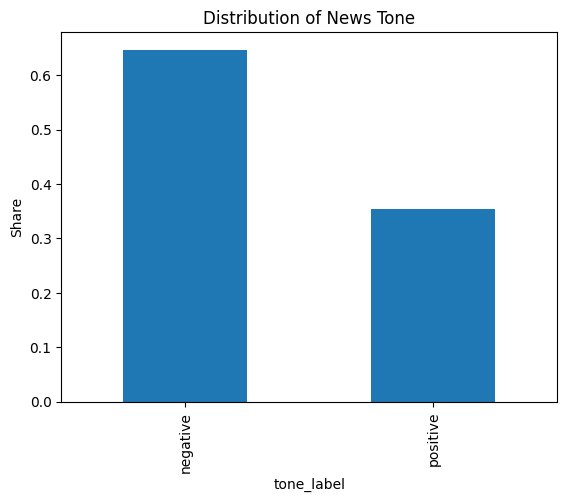

In [19]:
df["tone_label"].value_counts(normalize=True)
df["tone_label"].value_counts(normalize=True).plot(
    kind="bar",
    title="Distribution of News Tone"
)
plt.ylabel("Share")
plt.show()
